In [27]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import random
from pandas import DataFrame
random.seed(0)
%matplotlib inline
import scipy.optimize as opt 
from scipy.optimize import minimize

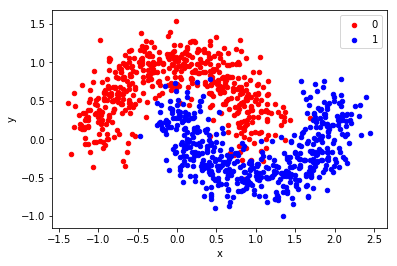

In [2]:

# create a synthetic dataset 
'''
DO NOT CHANGE BELOW CODE 
'''


from sklearn.datasets import make_moons

num_observation = 1000
X, y = make_moons(n_samples=num_observation, noise=0.20, 
    random_state=0)
    
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()

grouped = df.groupby('label')
#plt.figure()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


In [3]:
# create a function for prediction 
def predict(parameter1, parameter2):
    '''
    @parameter1: input feature set
    @parameter2: model coefficients
    Does: calculate the dot product
    return: the dot product value
    '''
	# TODO: YOUR CODE GOES HERE 
    return parameter1.dot(parameter2) 

In [31]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [4]:
def sigmoid(z):
    '''
    @z : value to pass to the model
    return : the sigmoid value
    '''
	# TODO: YOUR CODE GOES HERE 
    return 1/(1+np.exp(-z))

In [5]:
#不是，你这种问题设计出来根本没用脑子，连问题描述或者个公式都没有，神知道你要干什么
def cost_function(p1, p2, p3, lmd = 0.01):
    '''
    @parameters: theta, input features , target vector
    Does: calculate the cost of the model
    return: the cost value
    '''
	# TODO: YOUR CODE GOES HERE 
    m = len(p3)
    h = sigmoid(p2.dot(p1))
    
    J = (-1/m)*(np.log(h).T.dot(p3)+np.log(1-h).T.dot(1-p3))
    reg = (lmd/2/m)*np.sum(np.square(p1[1:]))
    J = J + reg
    return J

In [6]:
def gradient_descent(theta, p2, p3, lmd = 0.01):
    '''
    @parameters: theta, input features , target vector
    Does: calculate the gradient given the parameters
    return: the gradient 
    '''
	# TODO: YOUR CODE GOES HERE 
    m = len(p3)
    h = sigmoid(p2.dot(theta.reshape(-1,1)))
    print(h.shape)
    grad = (1/m)*p2.T.dot(h-p3) + (lmd/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad

In [8]:
def cost_function(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J

In [9]:
def gradient_descent(theta, X, y, lambda_t=0.01):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [11]:

# using sklearn create the dataset with PolynomialFeatures degree 6
df = np.asanyarray(df)  
from sklearn.preprocessing import PolynomialFeatures
# TODO: YOUR CODE GOES HERE 
	
poly = PolynomialFeatures(6)
poly_nomial_data = poly.fit_transform(X)
XX = poly_nomial_data
# DO NOT CHANGE BELOW CODE 
m, n = poly_nomial_data.shape
initial_theta = np.zeros(n)
learning_rate = 0.01

In [48]:
# DO NOT CHANGE BELOW CODE 

def plotData(data, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes, object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=30, 
    	linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=30, label=label_neg)
    axes.legend(frameon= True, fancybox = True);






In [81]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


-1.3846493123099242 2.4542864752007527
-1.3846493123099242 2.4542864752007527
-1.3846493123099242 2.4542864752007527


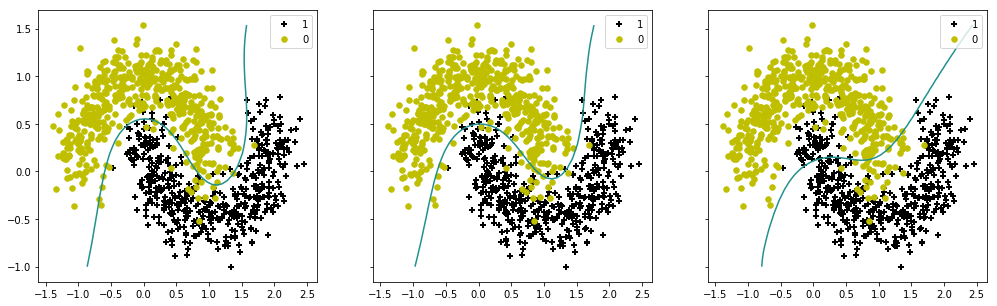

In [94]:
acc = []
costv = []
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))
for i, c in enumerate([1, 5, 100]): 
#    print(i,c)
    m, n = XX.shape
    learning_rate = 0.01
    initial_theta = np.zeros(n)
    for j in range(100000):
        cost = cost_function(initial_theta,XX,y,c)
        gradient = gradient_descent(initial_theta,XX,y,c)
        initial_theta = initial_theta-learning_rate* gradient
        costv.append(cost)
    accuracy = 100*sum(predict(initial_theta, XX) == y.ravel())/y.size    
    acc.append(accuracy)
    plotData(df, 1, 0, axes.flatten()[i])
    # Plot decision boundary
    
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    print(x1_min,x1_max)
    u_vals = np.linspace(x1_min,x1_max)
    v_vals = np.linspace(x2_min,x2_max)
    z = np.zeros((len(u_vals),len(v_vals)))
    
    for p in range(len(u_vals)):
        for j in range(len(v_vals)):
            z[p,j] =mapFeaturePlot(u_vals[p],v_vals[j],6) @ initial_theta
    axes.flatten()[i].contour(u_vals,v_vals,z.T,0)
   # xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min,x2_max))
    
  #  h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(initial_theta))
  #  h = h.reshape(xx1.shape)
    #print(h)
  #  axes.flatten()[i].contour(xx1, xx2, h, 0, linewidths=1, colors='r');       
 #   axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), c))

    